In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.despine(top=True, right=True, left=False, bottom=False)
plt.rc('font', family='Times New Roman')


<Figure size 640x480 with 0 Axes>

# Monthly Soil moisture (mm3/mm3) of California from 2017-2018 (24 months)

In [2]:
soil_moisture = []
for month in range(1, 10):
    f = nc.Dataset("../Data/2017_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20170"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    soil_moisture.append(sm[0][193][249])
for month in range(10, 13):
    f = nc.Dataset("../Data/2017_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-2017"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    soil_moisture.append(sm[0][193][249])
for month in range(1, 10):
    f = nc.Dataset("../Data/2018_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20180"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    processed_data = 0
    if(sm[0][193][249] == -9999.):
        _ = 0
        for j in range (-15, 15):
            if(sm[0][193][249+j] != -9999.):
                if(_ == 0):
                    _ = sm[0][193][249+j]
                else:
                    _ = (sm[0][193][249+j] + _)/2
        processed_data = _
    if(sm[0][193][249] != -9999.):
        soil_moisture.append(sm[0][193][249])
    else:
        soil_moisture.append(processed_data)
for month in range(10, 13):
    f = nc.Dataset("../Data/2018_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-2018"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    processed_data = 0
    if(sm[0][193][249] == -9999.):
        _ = 0
        for j in range (-15, 15):
            if(sm[0][193][249+j] != -9999.):
                if(_ == 0):
                    _ = sm[0][193][249+j]
                else:
                    _ = (sm[0][193][249+j] + _)/2
        processed_data = _
    if(sm[0][193][249] != -9999.):
        soil_moisture.append(sm[0][193][249])
    else:
        soil_moisture.append(processed_data)
for index, data in enumerate(soil_moisture):
    if(data == 0):
        data = (soil_moisture[index-1] + soil_moisture[index+1])/2
        soil_moisture[index] = data
print(soil_moisture)

[0.24582867, 0.26577717, 0.26728067, 0.26728737, 0.24231267, 0.146871, 0.14026248, 0.12776254, 0.11213975, 0.15040728, 0.15875389, 0.24747427, 0.21590715646743774, 0.23874135, 0.23361720144748688, 0.22849305, 0.21192941, 0.19964428, 0.101666465, 0.1041939, 0.09674478, 0.1386405, 0.21872484564420347, 0.22324495]


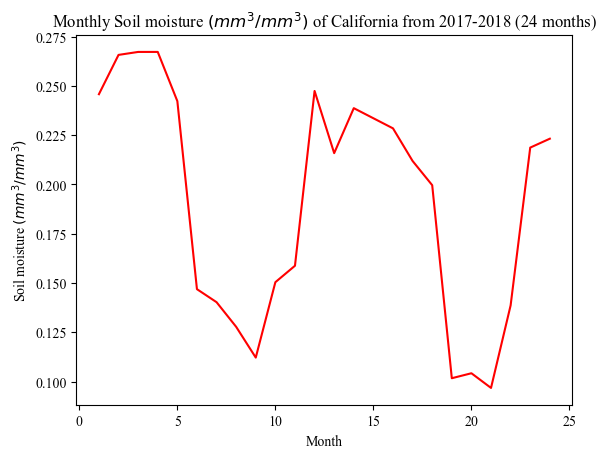

In [3]:
month = np.arange(1, 25, 1)
plt.title(r"Monthly Soil moisture $(mm^3/mm^3)$ of California from 2017-2018 (24 months)")
plt.xlabel("Month")
plt.ylabel(r"Soil moisture $(mm^3/mm^3)$")
plt.plot(month, soil_moisture, 'r')

In [4]:
air_pressure_california = pd.DataFrame(pd.read_csv("../Data/California_data/AirPressure.csv"))
air_pressure_list = air_pressure_california.values[0].tolist() + air_pressure_california.values[1].tolist()
rainfall_california = pd.DataFrame(pd.read_csv("../Data/California_data/ObservedRainfall.csv"))
rainfall_list = rainfall_california.values[0].tolist() + rainfall_california.values[1].tolist()
temperature_california = pd.DataFrame(pd.read_csv("../Data/California_data/Temperature.csv"))
temperature_list = temperature_california.values[0].tolist() + temperature_california.values[1].tolist()
rainfall_list[11] = (rainfall_list[12] + rainfall_list[10])/2
rainfall_list[13] = (rainfall_list[12] + rainfall_list[14])/1.5
rainfall_list[-1] = (rainfall_list[-2])*1.5
rainfall_list[0], rainfall_list[1] = rainfall_list[1], rainfall_list[0]
rainfall_list[0], rainfall_list[2] = rainfall_list[2], rainfall_list[0]
rainfall_list[3] = (rainfall_list[2] + rainfall_list[4])/2
for i in range(4, 11):
    rainfall_list[i] = (rainfall_list[i-1] + rainfall_list[i+1])/2 
for i in range(16, 22):
    rainfall_list[i] = (rainfall_list[i-1] + rainfall_list[i+1])/2 
print(rainfall_list)

[2.663870968, 11.26233333, 10.1072, 5.395212903, 2.811535023, 1.430928802, 0.765964401, 0.535724136, 0.474586206, 1.3774543935, 2.34913042275, 3.3208064520000002, 4.361290323, 6.996344086000001, 6.133225806, 1.707096774, 0.8983817205, 0.47608741174999997, 0.242377039375, 0.1466885196875, 0.39006839784374997, 1.809367532421875, 3.228666667, 4.8430000005]


C:\Users\Sycamore\AppData\Local\Temp\ipykernel_10468\742115302.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(month, air_pressure_list, 'r', marker='.', c='r', ms=5, linewidth='1', label="Air pressure")
C:\Users\Sycamore\AppData\Local\Temp\ipykernel_10468\742115302.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(month, temperature_list, "r", marker='.', c='g', ms=5, linewidth='1', label="Temperature")


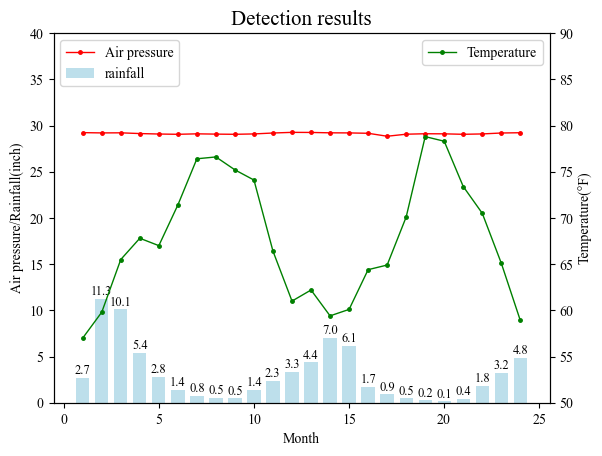

In [5]:
# 绘柱状图
plt.plot(month, air_pressure_list, 'r', marker='.', c='r', ms=5, linewidth='1', label="Air pressure")
plt.bar(x=month, height=rainfall_list, label='rainfall', color='lightblue', alpha=0.8, width=0.7)
for xx, yy in zip(month, rainfall_list):
    plt.text(xx, yy+0.1, str(round(yy, 1)), ha='center', va='bottom', fontsize=9)
plt.ylim(0, 40)
# 在左侧显示图例
plt.legend(loc="upper left")
# 设置标题
plt.title("Detection results", fontdict={'size': 15})
# 为两条坐标轴设置名称
plt.xlabel("Month")
plt.ylabel("Air pressure/Rainfall(inch)")

# 画折线图
ax2 = plt.twinx()
ax2.set_ylabel("Temperature(°F)")
ax2.set_ylim(50, 90)
# 设置坐标轴范围
plt.plot(month, temperature_list, "r", marker='.', c='g', ms=5, linewidth='1', label="Temperature")
plt.legend(loc="upper right")
# 显示数字

plt.show()
 

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
rainfall_list, temperature_list, air_pressure_list = np.array(rainfall_list), np.array(temperature_list), np.array(air_pressure_list)

C:\Users\Sycamore\AppData\Local\Temp\ipykernel_10468\2291923189.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(month, prediction, 'r', marker='*', c='b', ms=5, linewidth='1', label="Predicted Soil moisture")
C:\Users\Sycamore\AppData\Local\Temp\ipykernel_10468\2291923189.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(month, soil_moisture, 'r', marker='*', c='y', ms=5, linewidth='1', label="Actual Soil moisture")


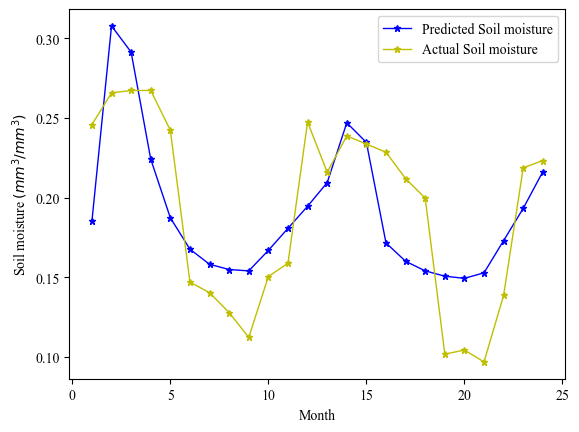

[0.01426728] 0.14715905345465793


In [7]:
from sklearn import linear_model
model = linear_model.LinearRegression()
df_train = pd.DataFrame({'rainfall': rainfall_list , 'temperature': np.log(temperature_list), 'soil_moisture': soil_moisture})
model.fit(df_train[['rainfall']], df_train['soil_moisture'])
prediction = model.predict(df_train[['rainfall']])

plt.xlabel("Month")
plt.ylabel(r"Soil moisture $(mm^3/mm^3)$")
plt.plot(month, prediction, 'r', marker='*', c='b', ms=5, linewidth='1', label="Predicted Soil moisture")
plt.plot(month, soil_moisture, 'r', marker='*', c='y', ms=5, linewidth='1', label="Actual Soil moisture")
plt.legend(loc="upper right")
plt.show()
print(model.coef_, model.intercept_)

In [8]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
import numpy as np


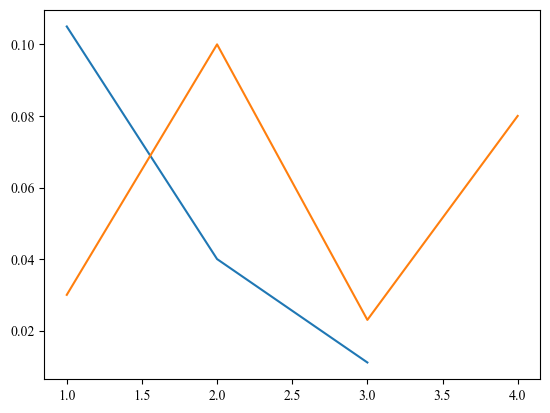

In [9]:

GrowthRate = np.array([0.03, 0.1, 0.105, 0.023, 0.04, 0.08, 0.0111])
Lifetime = np.array([100, 10, 5, 5, 1, 40, 2000])
OptimalRainfall = np.array([10, 7, 20, 7, 8, 8, 50])
damp = [0.03, 0.03, 0.05, 0.07, 0.1, 0.03, 0.02]
drought = [0.37000000000000033, 0.37000000000000033, 0.8000000000000007, 0.3100000000000002, 0.4500000000000003, 0.37000000000000033, 1.209000000000001]

x = np.linspace(1, 3, 3)
plt.plot(x, [GrowthRate[i] for i in [2, 4, 6]])

x = np.linspace(1, 4, 4)
plt.plot(x, [GrowthRate[i] for i in [0, 1, 3, 5]])
plt.show()

In [10]:
GrowthRate = [3, 2, 1]
Lifetime = [1, 1, 3]
OptimalRainfall = [2, 1, 3]
damp = [2, 3, 1]
drought=[2, 1, 3]

categories = ['Growth Rate', 'Lifetime', 'Optimal Rainfall', 'damp tolerance', 'drought tolerance']
dampspecies = ['Rhododendron', 'Perennial ryegrass', 'Redwood']
droughtspecies = ['Coastal Sage Scrub', 'Chaparral', 'Blue Grama', 'Desert Willow']
fig = go.Figure()
for i in range(3):
    fig.add_trace(go.Scatterpolar(
        r=[GrowthRate[i], Lifetime[i], OptimalRainfall[i], damp[i], drought[i]],
        theta=categories,
        fill='toself',
        name=dampspecies[i]
    ))

fig.update_layout(title='Test', width=800, height=800)

fig.show()


In [11]:
GrowthRate = [2, 4, 1, 3]
Lifetime = [4, 2, 1, 3]
OptimalRainfall = [4, 1, 1, 2]
damp = [1, 2, 4, 2]
drought=[3, 3, 1, 4]

categories = ['Growth Rate', 'Lifetime', 'Optimal Rainfall', 'damp tolerance', 'drought tolerance']
dampspecies = ['Rhododendron', 'Perennial ryegrass', 'Redwood']
droughtspecies = ['Coastal Sage Scrub', 'Chaparral', 'Blue Grama', 'Desert Willow']
fig = go.Figure()
for i in range(4):
    fig.add_trace(go.Scatterpolar(
        r=[GrowthRate[i], Lifetime[i], OptimalRainfall[i], damp[i], drought[i]],
        theta=categories,
        fill='toself',
        name=droughtspecies[i]
    ))

fig.update_layout(title='Test', width=800, height=800)

fig.show()